# **Case Study 2: ATM Transaction data**


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the dataset
df=pd.read_csv("/content/atm bank dataset.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,id,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [ ]:
print(df.shape )
#for knowing statastical values
df.describe()

(2244, 11)


,id,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
count,2244.000000,2244.000000,2244.000000,2244.000000,2.244000e+03,2.244000e+03
mean,5706.037433,3.557932,6.313280,2013.710784,5.150901e+05,5.157175e+05
std,3348.296502,1.760703,3.257336,1.920082,1.935272e+05,2.551791e+05
min,11.000000,1.000000,1.000000,2011.000000,1.800000e+03,1.000000e+02
25%,2816.750000,2.000000,4.000000,2012.000000,4.197290e+05,3.494750e+05
50%,5664.500000,4.000000,6.000000,2014.000000,5.403860e+05,5.141000e+05
75%,8447.250000,5.000000,9.000000,2015.000000,6.378000e+05,6.849250e+05
max,11585.000000,7.000000,12.000000,2017.000000,1.006829e+06,1.410700e+06




*   2244 rows and 11 columns




In [ ]:
#check the datatype of each variable
print(df.dtypes)
print()
#checking null values
print(df.isnull().sum())

#drop 1st and 2nd column from the dataset
df = df.drop(df.columns[[0,1]], axis=1) 

id                         int64
atm_name                  object
weekday                   object
festival_religion         object
working_day               object
holiday_sequence          object
trans_date_set             int64
trans_month                int64
trans_year                 int64
prevweek_mean              int64
total_amount_withdrawn     int64
dtype: object

id                        0
atm_name                  0
weekday                   0
festival_religion         0
working_day               0
holiday_sequence          0
trans_date_set            0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
dtype: int64


* There is no Null values.

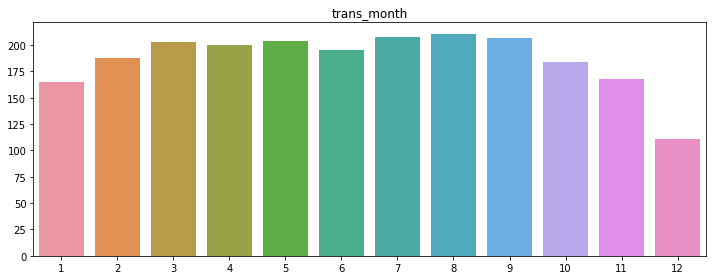

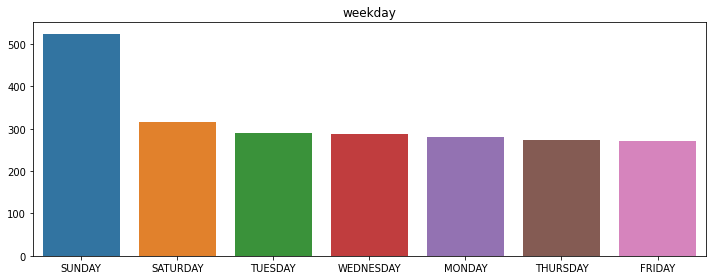

In [ ]:
categorcial_variables = ['trans_month','weekday']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().index,df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()

As we can see in the bar plot, Saturdays and Sundays are the most active days to withdraw money.


In [ ]:
#categorical to numerical
df=pd.get_dummies(df,columns=['weekday','festival_religion','working_day','holiday_sequence'])
df.shape

(2244, 27)

After OHE we have 2244 observations with 27 columns (features).

In [ ]:
#heatmap of correlation between each variable
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#selecting one feature amoung highly correlated varible
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df1 = df[selected_columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [ ]:

x = df1.drop(columns = ['total_amount_withdrawn'])
y = df1['total_amount_withdrawn']


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

#scaling target variable
ytrain=sc.fit_transform(ytrain.values.reshape(-1,1))
ytest=sc.transform(ytest.values.reshape(-1,1))



(1795, 24) (449, 24) (1795,) (449,)


#Linear Regression


In [ ]:
model=LinearRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)


In [ ]:
#calculating RMSE,MSE,MAE and r2_score
from sklearn import metrics
MAE_lr=metrics.mean_absolute_error(ytest,pred)
MSE_lr=metrics.mean_squared_error(ytest,pred)
RMSE_lr=np.sqrt(MSE_lr)
r2_lr=metrics.r2_score(ytest,pred)

print(MAE_lr)
print(MSE_lr)
print(RMSE_lr)                    
print(r2_lr)

0.6225659111176349
0.6275913064688766
0.7922066059235284
0.363379717300514


#XGBoost Regression

In [ ]:
import xgboost as xgb

model_xgb=xgb.XGBRegressor()
model_xgb.fit(xtrain,ytrain)
pred=model_xgb.predict(xtest)


[05:00:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn import metrics
MAE_xb=metrics.mean_absolute_error(ytest,pred)
MSE_xb=metrics.mean_squared_error(ytest,pred)
RMSE_xb=np.sqrt(MSE_xb)
r2_xb=metrics.r2_score(ytest,pred)

print(MAE_xb)
print(MSE_xb)
print(RMSE_xb)   
print(r2_xb)

0.4816322783065597
0.4304915657537396
0.6561185607447327
0.5633150754877749


#Support Vector Regression

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(xtrain,ytrain)

y_pred = regressor.predict(xtest)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
MAE_svr=metrics.mean_absolute_error(ytest,y_pred)
MSE_svr=metrics.mean_squared_error(ytest,y_pred)
RMSE_svr=np.sqrt(MSE_svr)
r2_svr=metrics.r2_score(ytest,y_pred)

print(MAE_svr)
print(MSE_svr)
print(RMSE_svr)   
print(r2_svr)

0.5469114324664873
0.5334158846312781
0.7303532601633802
0.4589100139372291


# ANN

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initializing the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(25, activation = 'relu', input_dim = 24))
# Adding the 2 hidden layer
classifier.add(Dense(20, activation = 'relu'))
# Adding the 3 hidden layer
classifier.add(Dense(15, activation = 'relu'))
# Adding the 4 hidden layer
classifier.add(Dense(8,  activation = 'relu'))
# Adding the output layer
classifier.add(Dense(1, activation = 'linear'))
# Adding the output layer
#classifier.add(Dense(1, activation = 'linear'))
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'mse')
# Fitting the ANN to the Training set
classifier.fit(xtrain, ytrain, batch_size=100,epochs = 500)
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(xtest)

In [ ]:
from sklearn import metrics

MAE_NN=metrics.mean_absolute_error(ytest, y_pred)
MSE_NN=metrics.mean_squared_error(ytest, y_pred)
RMSE_NN=np.sqrt(metrics.mean_squared_error(ytest, y_pred))
r2_NN=metrics.r2_score(ytest,y_pred)
print(MAE_NN)
print(MSE_NN)
print(RMSE_NN)
print(r2_NN)

0.6569505556820857
0.8699898953722366
0.932732488644111
0.11749380938080911


# Comparitive analysis

In [ ]:
ind=['Linear regression','XGBoost Regression','Support Vector Regression','ANN']
data={"MAE":[MAE_lr,MAE_xb,MAE_svr,MAE_NN],"MSE":[MSE_lr,MSE_xb,MSE_svr,MSE_NN],
      "RMSE":[RMSE_lr,RMSE_xb,RMSE_svr,RMSE_NN],"r2_acore":[r2_lr,r2_xb,r2_svr,r2_NN]}
result=pd.DataFrame(data=data,index=ind)
result

,MAE,MSE,RMSE,r2_acore
Linear regression,0.622566,0.627591,0.792207,0.363380
XGBoost Regression,0.481632,0.430492,0.656119,0.563315
Support Vector Regression,0.546911,0.533416,0.730353,0.458910
ANN,0.656951,0.869990,0.932732,0.117494
